<a href="https://colab.research.google.com/github/meetdave01/Capstone-Project-EDA-/blob/main/Group_Capstone_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Capstone Project
#<u>**Hotel Booking Analysis**</u>

##### **Project type:**  EDA
##### **Notebook type:** Group

##### **Team:** data_driven

##### **Team members:**
* Chandan Prasad
* Nikhil Solanki
* Prerna Kashyap
* Meet Dave
* Lalith Kumar PS

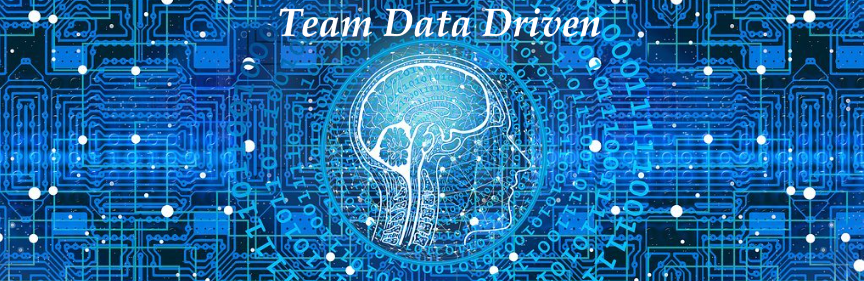

**BUSINESS PROBLEM OVERVIEW**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings.

**BUSINESS OBJECTIVE**

Objective is to explore and inspect the data; and discover important features that can govern bookings and help not only hotels in attracting more customer but also help the customers in deciding best period to visit places while availing low accomodation cost benefits

## Importing Libraries and Dataset Loading

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime


In [ ]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#csv file location
csv_file = ('/content/drive/MyDrive/Hotel Booking Analysis - Nikhil Solanki/Hotel Bookings.csv')

#Reading the data set
data_set = pd.read_csv(csv_file)

#Creating a copy of data set
data = data_set.copy()

##Data Exploration and Inspection

In [ ]:
#Checking the rows and column of the data
print(f'We have {data.shape[0]} of rows and {data.shape[1]} columns.')

We have 119390 of rows and 32 columns.


In [ ]:
#Checking the first 5 rows of data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Checking the bottom 5 rows of the data 
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#Checking statistical data on numerical columns.
data.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
#Data information. Inspecting each columns and its dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Data Description:



1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel*

## Data Cleaning


1. Handling Null values
2. Dropping irrelevant columns and rows
3. Parsing date in string to Datetime format
4. Adding new feature columns

In [ ]:
#Checking for null count and its percentage in each and every column to make decision on how to handle those
null_df = pd.DataFrame(data.isnull().sum().sort_values(ascending = False)[:6], columns=['Null values'])
null_df['Null Percentage'] = null_df['Null values'] / data.shape[0] * 100
null_df

,Null values,Null Percentage
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000


In [ ]:
#Filling null values in agent with 0 assuming those rooms were booked without any agents
data["agent"].fillna(0,inplace=True)

#Filling null values in children with 0 assuming 0 children in that family
data["children"].fillna(0,inplace=True)

#Filling null values in Country with 'Other' category assuming tourist belong to country other than available list
data["country"].fillna('other',inplace = True)

In [ ]:
#Droping company column because it contains 94% null data
data.drop(['company'], axis=1, inplace=True)

#Droping rows where there is no data on adults, children, babies combined
no_guest=data[data['adults']+data['babies']+data['children']==0]
data.drop(no_guest.index, inplace=True)

In [ ]:
#Checking the null values
data.isna().sum().sort_values(ascending=False)[:5]

hotel                          0
is_repeated_guest              0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [ ]:
#Parsing reservation_status date into datetime
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format = '%Y-%m-%d')

###Adding new columns of Arrival month, Total People and Total Stay

In [ ]:
#Parsing arrival_date_month into datetime and adding a new column with parsed month number
data['arrival_month'] = data['arrival_date_month'].apply(lambda x : datetime.strptime(x,'%B'))
data['arrival_month'] = data['arrival_month'].apply(lambda x : x.month)           #Will be used for sorting columns months wise

In [ ]:
#Adding new column "total_pepole" by adding columns values of 'adults', 'children' and 'babies'
data['total_people'] = data['adults'] + data['children'] + data ['babies']

#Adding new column 'total_stay' by adding columns values of 'stays_in_weekend_nights' and 'stays_in_week_nights'
data['total_stay'] = data ['stays_in_weekend_nights'] + data ['stays_in_week_nights']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  float64

In [ ]:
#Checking of new columns
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_month,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2.0,2


In [ ]:
#Final size of dataset post cleaning
data.shape

(119210, 34)

### Checking the unique values in categorical columns

In [ ]:
#Removing the datetime datatype and unique country data 
categorical_cols=list(set(data.drop(columns=['reservation_status_date','country','arrival_date_month','arrival_date_day_of_month', 'arrival_date_year']).columns)- set(data.describe()))

#Runing the forloop to know the unique values for data analysis
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(data[col].unique())}')

Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']


#EDA (Exploratory Data Analysis)

##1. Booking percentage of different type of Hotels

In [ ]:
#Fetching unique hotel count
booking_df = data['hotel'].value_counts()
booking_df

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

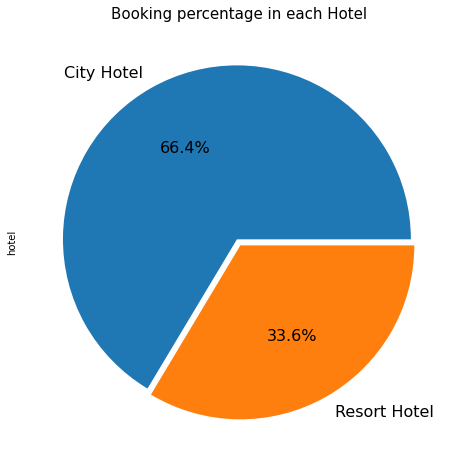

In [ ]:
#Plotting pie chart of unique Hotel booking %
x_axis = booking_df.plot.pie(figsize=(10,8),fontsize=16, autopct='%1.1f%%',explode=[0.02,0.02])

x_axis.set_title('Booking percentage in each Hotel',fontsize=15)
plt.show()

**INFERENCE:**
* Majority of the guest prefer City Hotel over Resort Hotel
* 2/3rd of total guest prefer City Hotel



##2. Home country of majority of guests

In [ ]:
#Hotels where bookings were not cancelled. No point in considering data where guest didnt make it.
not_cancelled_df = data[data['is_canceled']==0]

In [ ]:
#Country and Hotel wise combined booking
country_hotel_df = not_cancelled_df.groupby(['country','hotel'],as_index=False).count().sort_values(['is_canceled'],ascending=False)

#Top 15 countries from where most of the guest visits
top_15_countries = country_hotel_df.groupby('country')['is_canceled'].sum().sort_values(ascending=False).reset_index()[:15]
top_15_countries.rename(columns={'is_canceled':'Country'},inplace=True)
top_15_countries.set_index('country',inplace=True)

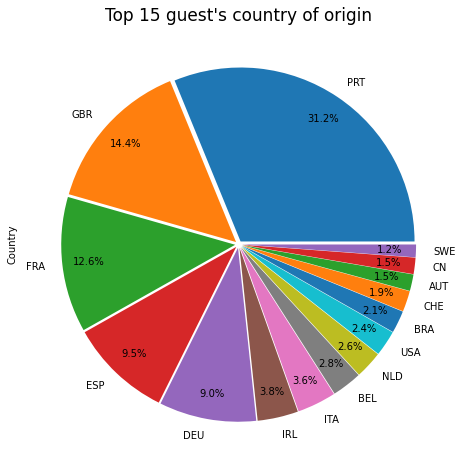

In [ ]:
#Plotting Pie chart of top 15 guest's country of origin
fig,ax = plt.subplots(figsize=(10,8))
top_15_countries['Country'].plot(kind = 'pie',autopct='%1.1f%%',explode=[0.02]*15,pctdistance=0.85)
plt.title("Top 15 guest's country of origin", fontsize = 17)
plt.show()

**INFERENCE:**
* From plotted pie chart, its evident that most of guest visiting these City hotels and Resort hotels are from Portugal and other European countries namely Britain, France, Spain and Germany.

## 3. Hotel preference of guest from Top 5 Countries
#### What are the hotel preferences of guest from Top 5 Countries which amounts of nearly 75% of total booking counts?

In [ ]:
#Top 5 countries in terms of booking count
top_countries = country_hotel_df.groupby('country')['is_canceled'].sum().sort_values(ascending=False)[:5]

#Hotel wise booking for each of top  coutries
top_countries_hotel_df = country_hotel_df[country_hotel_df['country'].isin(top_countries.index)]

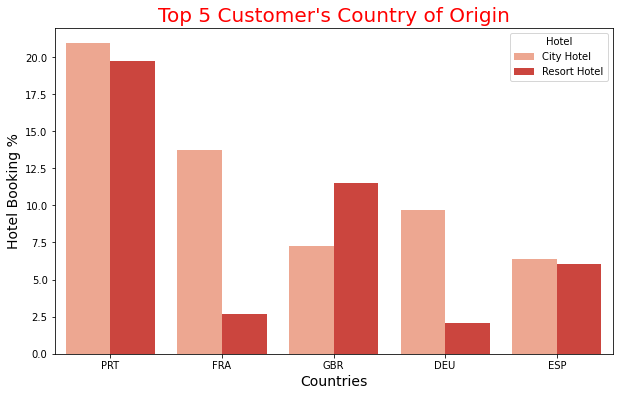

In [ ]:
#Plotting Hotel type preference of Tourist belonging to Top 5 countries
fig,ax = plt.subplots(figsize=(10,6))

y_percent = top_countries_hotel_df['is_canceled']/top_countries_hotel_df['is_canceled'].sum()*100
sns.barplot(x=top_countries_hotel_df['country'], y=y_percent, hue=top_countries_hotel_df['hotel'], palette='Reds')

#Axis labels, title, legend
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Hotel Booking %', fontsize=14)
plt.title('Top 5 Customer\'s Country of Origin', {'color':'r'}, fontsize=20)
plt.legend(title = 'Hotel')
plt.show()

**INFERENCE:**

Considering top 5 coutries, it is evident from above bar graph:
* Guest from southern European coutries like Portugal and Spain prefer City Hotel and Resort Hotel equally
* Guest from northern European countries like France and Germany prefer City Hotel a lot more than Resort Hotel 
* Guest from Britain prefers lavish Resort hotels 

This makes us believe that people from different region of Europe prefer different type of accomodations and comforts.

## 4. Overview of guest's visit over different years

**Problem:** Overview of number of people who booked the Hotel

In [ ]:
# Looking into adults. 
# Using groupby to group according to hotel types only.
data['adults'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79163.0,1.854882,0.502676,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40047.0,1.867755,0.696587,1.0,2.0,2.0,2.0,55.0


In [ ]:
# Looking into children. 
# Using groupby to group according to hotel types only.
data['children'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79163.0,0.091558,0.372537,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40047.0,0.128724,0.445261,0.0,0.0,0.0,0.0,10.0


**Inference**

* From hotel's statistical data, we can notice that larger families which includes children prefers Resort Hotel more than City Hotel.

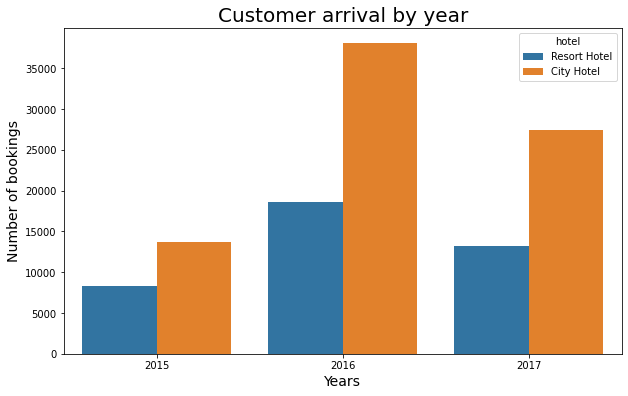

In [ ]:
plt.figure(figsize=(10,6))

list1=['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month']
arrival_overview = data[list1]
sns.countplot(data =arrival_overview, x = 'arrival_date_year', hue = 'hotel').set_title('Customer arrival by year',fontsize=20)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Number of bookings',fontsize = 14)
plt.show()

**Inference**
* As we can see that 2016 was the year where number of hotel booking was highest followed by total booking in 2017 and 2015.


##5. Booking trend round the year
Which are the peak season / off season for hotels?

In [ ]:
#selecting those where booking is not cancelled
hotel_df1_not_canceled = data[data['is_canceled'] == 0]


## Order of months
Months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']


## Select only City Hotel
sorted_months = hotel_df1_not_canceled.loc[data.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(Months_list)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

## Select only Resort Hotel
sorted_months = hotel_df1_not_canceled.loc[data.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(Months_list)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

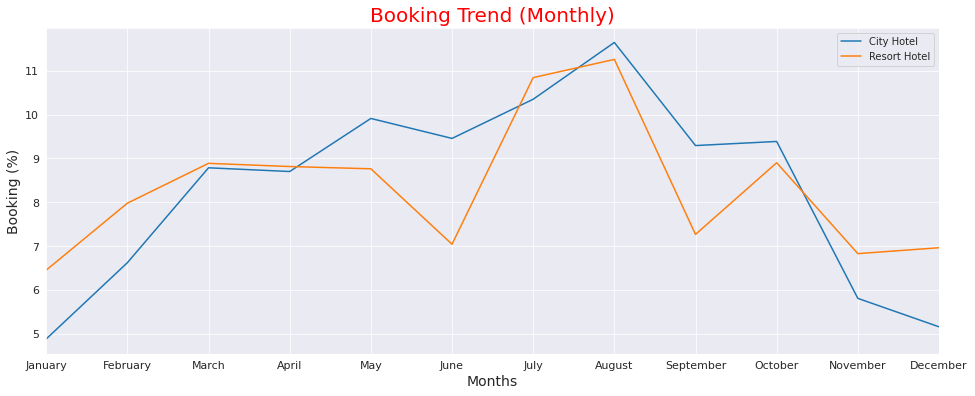

In [ ]:
# Plotting Booking Line trend
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,6))

sns.lineplot(x=x1,y=y1.values, label='City Hotel', sort=False)
sns.lineplot(x=x2,y=y2.values, label='Resort Hotel', sort=False)

ax.set_xlabel('Months',fontsize=14)
ax.set_ylabel('Booking (%)',fontsize=14)
ax.set_title('Booking Trend (Monthly)',{'color':'r'},fontsize=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.margins(x=0)
plt.show()

**Inference**
* Peak visiting season is from mid June to August because of summer breaks in Europe 
* Off season is from November to February because of cold weather throughout Europe 
* Guests can consider visiting these hotels during month of June and September to enjoy decent weather with almost full availabity of hotels accommodation.


## 6. Price trend round the year
Which is the best season to visit while leveraging benefits of low cost accommodation?

In [ ]:
#Average Monthly rate
avg_monthly_rate = not_cancelled_df.groupby(['arrival_month','arrival_date_month','hotel'], as_index=False)['adr'].mean()

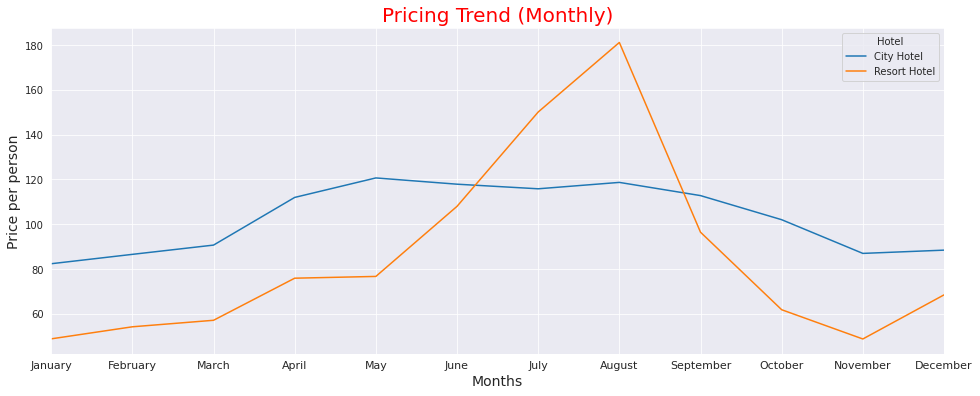

In [ ]:
# Plotting Pricing Line trend
fig, ax = plt.subplots(figsize=(16,6))

sns.lineplot(data=avg_monthly_rate, x = 'arrival_date_month', y = 'adr', hue='hotel')

plt.xlabel('Months', fontsize=14)
plt.ylabel('Price per person', fontsize=14)
plt.title('Pricing Trend (Monthly)', {'color':'r'}, fontsize=20)
plt.legend(title='Hotel')
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.margins(x=0)
plt.show()

**INFERENCE:**
* Pricing trend is highly corelated with booking trend when it comes to Resort hotel
* Pricing trend here indicates that during Peak season, price for Resort hotels is triple compared to off-season 
* Pricing trend City hotels suggests almost same pricing throughout the year with bit of fluctuation during May to August



## 7. Average booking rate of different Market Segments

In [ ]:
#Groupby market segment and hotel
bar_chart = data.groupby(['hotel','market_segment'])['adr'].count().unstack().transpose().fillna(0)
bar_chart.drop('Undefined',axis =0, inplace = True)

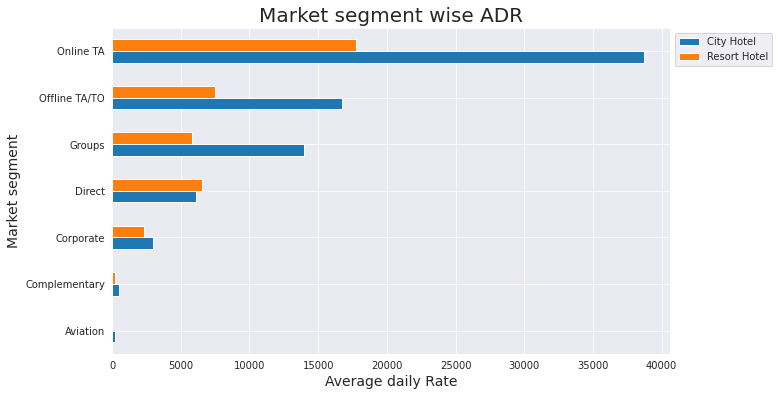

In [ ]:
#Plotting bar chart for market segment of both hotels by average daily rate
ax =  bar_chart.plot(kind = "barh",figsize=(10,6))
ax.legend(bbox_to_anchor=(1,1))

#adding the label of the chart
ax.yaxis.set_label_text("Market segment", fontsize = 14)
ax.xaxis.set_label_text("Average daily Rate", fontsize = 14)
ax.set_title("Market segment wise ADR", fontsize = 20)
#Displaying the chart 
plt.show()

**Inference**

* As we can see, Resort hotel and City hotel are getting the most of booking from Online travel agency and may be in future it will be monopoly by them. Hence hotel owners should promote more in different market segments

## 8. Reservation status from different Distribution Channels

In [ ]:
#Groupby Reservation Status and Distribution Channels for each Hotel
table1=data.groupby(['hotel','distribution_channel','reservation_status'], as_index=False)['is_canceled'].count().sort_values('is_canceled', ascending=False)
pivot=table1.pivot_table(values='is_canceled', index=['hotel','distribution_channel'],columns='reservation_status').transpose()
pivot.fillna(0, inplace=True)

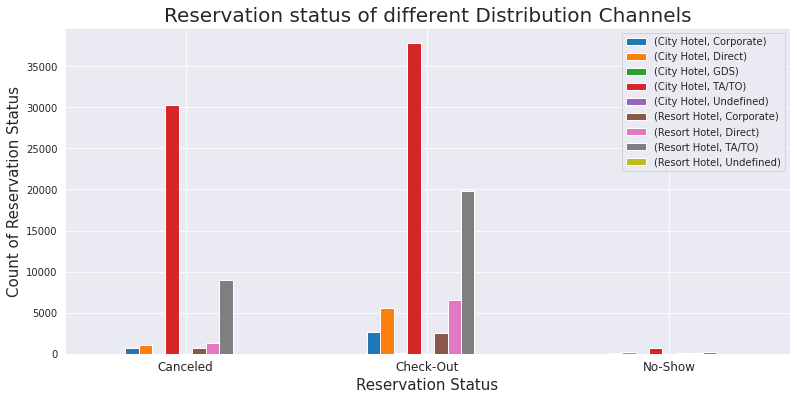

In [ ]:
#Plotting bar graph for different Reservation status by diiferent Distribution Channels
can=pivot.plot(kind = 'bar',figsize=(13,6))
can.legend(bbox_to_anchor=(1,1))

#Labeling the chart
can.yaxis.set_label_text("Count of Reservation Status", fontsize = 15)
can.xaxis.set_label_text("Reservation Status", fontsize = 15)
can.set_title("Reservation status of different Distribution Channels", fontsize = 20)
plt.xticks(rotation = 0,fontsize = 12)
plt.show()

**Inference**
* We can infer from above graph that Bookings and Cancellations from both Hotels are more from Travel agency (TA/TO)
* Guest visiting both Hotels directly and via Corporate are less likely to cancel their booking
* We can notice a very small proportion of guest booking via Travel agency not showing up at Hotel

## 9. Correlation between different booking criteria
What is the Correlation between Booking, Pricing, Stay, Cancellation, Parking and Guest Revisiting?

In [ ]:
#Aggregation of guest's monthly bookings which were checked out
checked_out = not_cancelled_df.groupby(['arrival_month'], as_index=False).agg({'is_canceled':'count',
                                                                     'adr':'mean',
                                                                     'total_stay':'sum',
                                                                     'required_car_parking_spaces':'sum',
                                                                     'is_repeated_guest':'sum'})

#Guest who cancelled their booking
canceled_df = data.loc[data['reservation_status']=='Canceled',['arrival_month','reservation_status']]
canceled_df.replace('Canceled',1, inplace=True)
canceled = canceled_df.groupby(['arrival_month'], as_index=False)['reservation_status'].sum()

In [ ]:
#Merging Cancelled and Non-cancelled dataset based on Month
merge_df = pd.merge(checked_out,canceled,how='inner', on = ['arrival_month'])
merge_df.rename(columns={'is_canceled':'Booking Count',
                         'adr':'Price',
                         'total_stay':'Total stay',
                         'reservation_status':'Cancellation',
                         'is_repeated_guest':'Repeated Customer',
                         'required_car_parking_spaces':'Parking Spaces'},inplace=True)

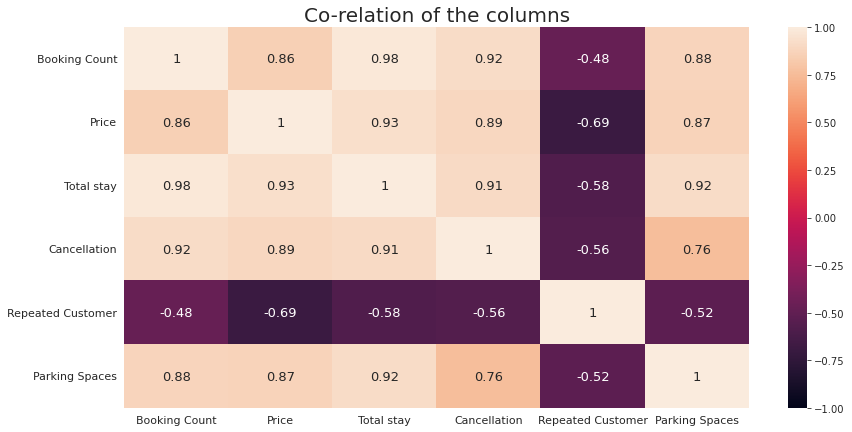

In [ ]:
#Plotting correlation heatmap for different booking criteria
plt.figure(figsize=(14,7))
sns.heatmap(merge_df[['Booking Count','Price','Total stay','Cancellation','Repeated Customer','Parking Spaces']].corr(),vmin=-1,annot=True, annot_kws={"size":13})

plt.title('Co-relation of the columns', fontsize=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11,rotation=0)
plt.show()

**Inference**
* There is high positive correlation between Booking, Pricing, Total Stay, Cancellations and Parking spaces where as negative correlation with Repeated guests
* With increase in Booking; Pricing, Total stay and Parking spaces occupation increases which is also evident from our plotted Booking and Pricing line graphs
* But increase in Pricing leads to repeated Customers not visiting again
* There is firm correlation between Parking space and Cancellation infering that people are more likely to cancel their booking if Parking space is not available. 

## 10. Guest's stay length
What is most preferred stay length in each hotel?


In [ ]:
#hotel_df1['total_stay'].max()
hotel_stay_df1 = not_cancelled_df[not_cancelled_df['total_stay'] <= 15]  #Visualizing pattern till 15days stay

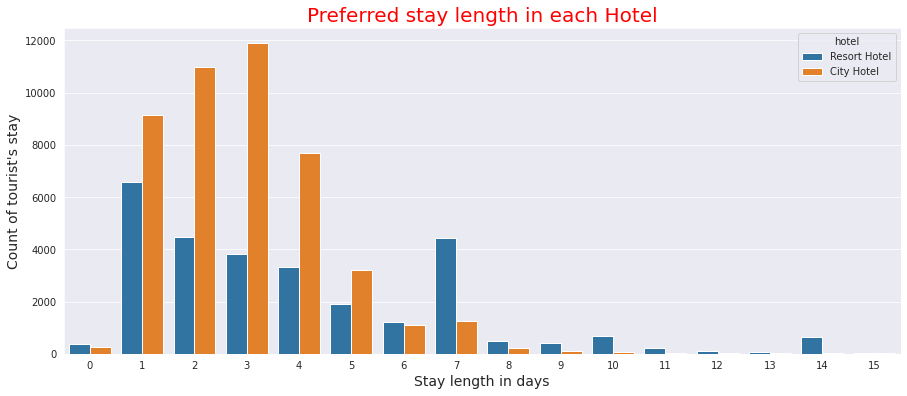

In [ ]:
#Setting plot size and plotting barchart
plt.figure(figsize = (15,6))
sns.countplot(x = hotel_stay_df1['total_stay'], hue = hotel_stay_df1['hotel'])

#Adding the label of the chart
plt.title('Preferred stay length in each Hotel',fontsize = 20, Color = 'R' )
plt.xlabel('Stay length in days', fontsize=14)
plt.ylabel("Count of tourist's stay", fontsize=14)
plt.show()

**Inference**
* Guest prefer 1-4 days when staying in City Hotels
* Guest prefer 1-4 days when staying in Resort Hotels as well but 7 days stay is also popular choice among guests

# Conclusion

* Majority (66%) of the guests prefer City Hotel over Resort Hotel. Most of guest visiting these hotels are from European countries namely Portugal, Britain, France, Spain and Germany totaling to 75% of total booking count.

* Guest from southern European coutries like Portugal and Spain prefer both hotels equally. Guest from northern European countries like France and Germany prefer City hotel nearly 10% more than Resort hotel. Guests from Britain prefers lavish Resort hotels nearly 5% more than Resort hotel. This indicated that people from different region of Europe prefer different type of accommodations and comforts.

* 2016 observed the highest booking reservations. From Booking trend it can be inferred that Peak visiting season is from mid June to August because of summer breaks in Europe while November to February is off season because of freezing cold weather throughout Europe. 
* Around 11.5% of total reservations throughout year are coming from August whereas January has the least reservation of mere 5%. Guests can consider visiting these hotels during month of June and September to enjoy decent weather with almost full availability of hotels accommodation.

* Pricing trend is highly correlated with booking trend indicating that price for Resort hotels during peak season hikes to nearly 300% compared to off-season. Meanwhile, Pricing trend for City hotels suggests almost same pricing throughout the year with low fluctuation during busy period from May to August

* Inspecting different market segments, it was concluded that Online travel agency holds monopoly as both hotels are getting the most of booking from Online travel agency (around 79%). Hotel owners should consider promoting their hotels more in different market segments to penetrate market more.

* Interstingly, most of the Cancellations for both Hotels are also from Travel agency (TA/TO) segment infering that it is volatile market segment. Also, a very small proportion of guest booking via Travel agency do not showing up at Hotel. Guest visiting both Hotels directly and via Corporate are less likely to cancel their booking

* There is high positive correlation between Booking, Pricing, Total Stay, Cancellations and Parking spaces whereas negative correlation with Repeated guests. With increase in Booking --> Pricing, Total stay and Parking spaces occupation increases but increase in Pricing leads to repeated Customers not visiting again.
* There is firm correlation between Parking space and Cancellation inferring that people are more likely to cancel their booking if Parking space is not available. 
* Ideally guest prefer to stay 1-4 days in both hotels but 7 days stay at Resort hotel is also a popular choice among guests.